# Olympic medal count predictions by country
## Group members - Swaroop Shivarai Teli (97323729), Chirag Suryakant Patole (24220357),Yash Vaibhav Chavan (38777287).

## Data Analysis and Preprocessing
### Load the dataset

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [4]:
teams = pd.read_csv("teams.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


## Inspect the dataset

In [5]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


## Select relevant columns

In [6]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

## Handle missing values

In [11]:
teams[teams.isnull().any(axis=1)].head(20)

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
82,ARM,Armenia,1996,38,24.0,NaN,2
88,ARU,Aruba,1988,12,27.8,NaN,0
96,ASA,American Samoa,1988,6,27.0,NaN,0
131,AZE,Azerbaijan,1996,24,25.1,NaN,1
150,BAN,Bangladesh,1984,2,21.0,NaN,0


In [12]:
teams = teams.dropna()

## Exploratory Data Analysis (EDA)
### Correlation Matrix

In [7]:
numeric_teams = teams.select_dtypes(include=[np.number])
if 'medals' in numeric_teams.columns:
    corr_matrix = numeric_teams.corr()

    print(corr_matrix['medals'])
else:
    print("'medals' column is not present in the numeric DataFrame.")

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64


## Visualize relationships

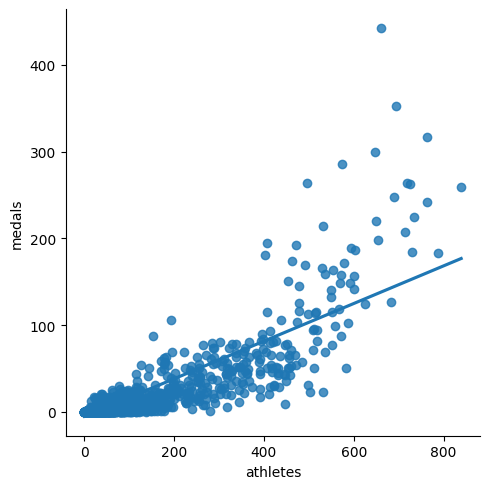

In [8]:
sns.lmplot(x='athletes',y='medals',data=teams,fit_reg=True, ci=None) 

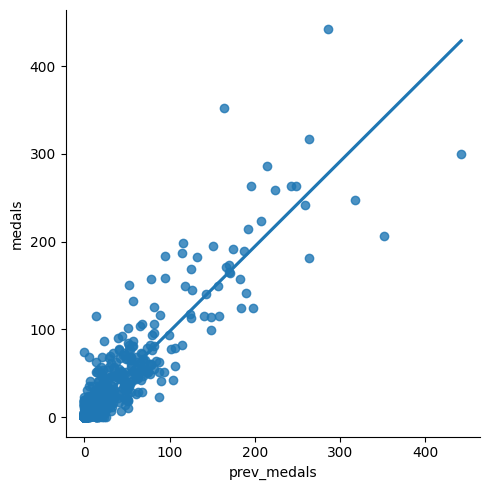

In [9]:
sns.lmplot(x='prev_medals',y='medals',data=teams,fit_reg=True, ci=None) 

<Axes: ylabel='Frequency'>

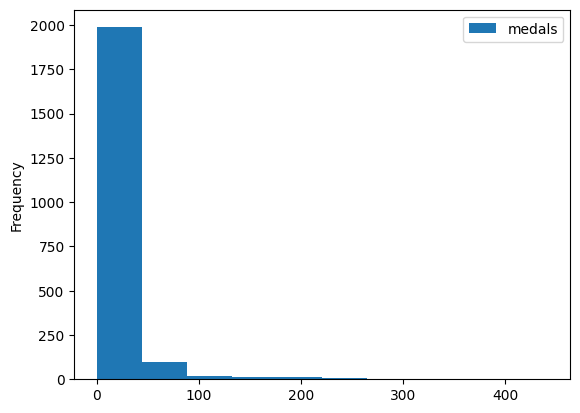

In [10]:
teams.plot.hist(y="medals")

## Model Training and Evaluation

### Linear Regression - Split the data into training and testing sets

In [13]:
teams.shape

(2014, 7)

In [14]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [15]:
train.shape

(1609, 7)

In [16]:
test.shape

(405, 7)

### Train the Linear Regression model

In [18]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
predictors = ["athletes", "prev_medals"]
reg.fit(train[predictors], train["medals"])

LinearRegression()

### Make predictions and evaluate the model

In [19]:
predictions = reg.predict(test[predictors])

In [20]:
test["predictions"] = predictions
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [21]:
test.loc[test["predictions"] < 0, "predictions"] = 0
test["predictions"] = test["predictions"].round()

In [22]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


### mean absolute error

In [23]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])
error

np.float64(3.2987654320987656)

### checking MSE value is good or not with medals column. error should be below std deviation

In [23]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [24]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [25]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [26]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


### finding MSE by subtracting prdiction from actual medals

errors = (test["medals"] - test['predictions']).abs()
errors

### grouping error by team

In [28]:
error_by_team = errors.groupby(test["team"]).mean()
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

### medals each country earned on average

In [29]:
medals_by_team = test["medals"].groupby(test["team"]).mean()
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

### error ratio between errors

In [30]:
error_ratio =  error_by_team / medals_by_team 
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

### lot of NaN values coz avergae number of medals earned by lot of team is zero, so when dividing by zero we get a missing value.

In [50]:
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

### when 'error_by_team' is 1 & 'medals_by_team' we get infinite value and if both are 0 we get NaN. these values are removed so that gives us only countries that we have an actual error ratio

<Axes: ylabel='Frequency'>

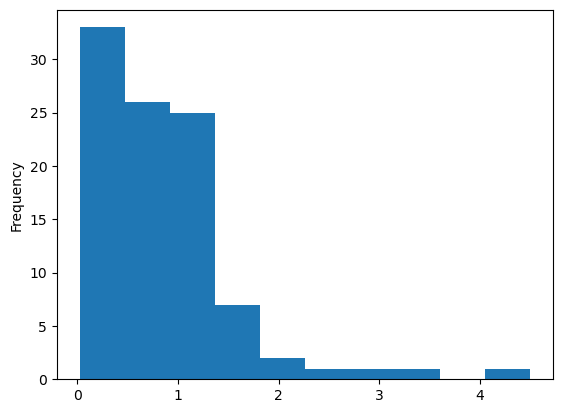

In [51]:
error_ratio.plot.hist()

### The visualization indicates that an error ratio between 0 and 0.5 means our predictions are within 50 percent of the actual medal count. However, in some instances, the error ratio reaches 2 or higher, which implies that our predictions were either twice as high or half as low as the actual medal count. This observation suggests that in such cases, we are quite far off from the true values.

In [52]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

### The Linear regression model performs very well for countries (e.g. France, Canada & Russia) that get a lot of medals as their error ratio is pretty low.

## Implementing Random forest model

In [31]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)

predictors = ["athletes", "prev_medals"]

rf.fit(train[predictors], train["medals"])

rf_predictions = rf.predict(test[predictors])

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [25]:

rf_mae = mean_absolute_error(test["medals"], rf_predictions)
print(f"Random Forest MAE: {rf_mae}")

print(f"Linear Regression MAE: {error}")

test["rf_predictions"] = rf_predictions

print(test.head())

Random Forest MAE: 3.88926773681149
Linear Regression MAE: 3.2987654320987656
   team      country  year  athletes   age  prev_medals  medals  predictions  \
6   AFG  Afghanistan  2012         6  24.8          1.0       1          0.0   
7   AFG  Afghanistan  2016         3  24.7          1.0       0          0.0   
24  ALB      Albania  2012        10  25.7          0.0       0          0.0   
25  ALB      Albania  2016         6  23.7          0.0       0          0.0   
37  ALG      Algeria  2012        39  24.8          2.0       1          2.0   

    rf_predictions  
6         0.005077  
7         0.033199  
24        0.054754  
25        0.043689  
37        3.151381  


### Random Forest MAE: 3.88926773681149
### Linear Regression MAE: 3.2987654320987656
### Here we can see the comparison of MAE value of both models where linear regression model is good fit as its MAE value is low than Random forest model

# Implementing Gradient Boosting Regressor

In [32]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error


gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

predictors = ["athletes", "prev_medals"]


gbr.fit(train[predictors], train["medals"])


gbr_predictions = gbr.predict(test[predictors])



In [30]:

gbr_mae = mean_absolute_error(test["medals"], gbr_predictions)
print(f"Gradient Boosting Regressor MAE: {gbr_mae}")


print(f"Linear Regression MAE: {error}")


test["gbr_predictions"] = gbr_predictions


print(test.head())

Gradient Boosting Regressor MAE: 3.7683317401964764
Linear Regression MAE: 3.2987654320987656
   team      country  year  athletes   age  prev_medals  medals  predictions  \
6   AFG  Afghanistan  2012         6  24.8          1.0       1          0.0   
7   AFG  Afghanistan  2016         3  24.7          1.0       0          0.0   
24  ALB      Albania  2012        10  25.7          0.0       0          0.0   
25  ALB      Albania  2016         6  23.7          0.0       0          0.0   
37  ALG      Algeria  2012        39  24.8          2.0       1          2.0   

    rf_predictions  gbr_predictions  
6         0.005077         0.210438  
7         0.033199         0.210438  
24        0.054754         0.210438  
25        0.043689         0.210438  
37        3.151381         1.962274  


### Random Forest MAE: 3.88926773681149

### Linear Regression MAE: 3.2987654320987656

### Gradient Boosting Regressor MAE: 3.7683317401964764

### Here we can see the comparison of MAE value of all three models where linear regression model is good fit as its MAE value is low than Random forest model and Gradient boosting Regressor

# Implementing Support Vector Regressor model

In [34]:

from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[predictors])
test_scaled = scaler.transform(test[predictors])

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

svr.fit(train_scaled, train["medals"])

svr_predictions = svr.predict(test_scaled)


In [36]:

svr_mae = mean_absolute_error(test["medals"], svr_predictions)
print(f"Support Vector Regressor MAE: {svr_mae}")

# Compare with the other models
print(f"Random forest MAE: {rf_mae}")
print(f"Linear Regression MAE: {error}")
print(f"Gradient Boosting Regressor MAE: {gbr_mae}")


test["svr_predictions"] = svr_predictions


print(test.head())

Support Vector Regressor MAE: 5.22886253524845
Random forest MAE: 3.88926773681149
Linear Regression MAE: 3.2987654320987656
Gradient Boosting Regressor MAE: 3.7683317401964764
   team      country  year  athletes   age  prev_medals  medals  predictions  \
6   AFG  Afghanistan  2012         6  24.8          1.0       1          0.0   
7   AFG  Afghanistan  2016         3  24.7          1.0       0          0.0   
24  ALB      Albania  2012        10  25.7          0.0       0          0.0   
25  ALB      Albania  2016         6  23.7          0.0       0          0.0   
37  ALG      Algeria  2012        39  24.8          2.0       1          2.0   

    rf_predictions  gbr_predictions  svr_predictions  
6         0.005077         0.210438         0.189006  
7         0.033199         0.210438         0.245966  
24        0.054754         0.210438        -0.014181  
25        0.043689         0.210438         0.042199  
37        3.151381         1.962274         0.582242  


# Implementing KNN Regressor


In [37]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[predictors])
test_scaled = scaler.transform(test[predictors])


knn = KNeighborsRegressor(n_neighbors=5)


knn.fit(train_scaled, train["medals"])


knn_predictions = knn.predict(test_scaled)



In [39]:

knn_mae = mean_absolute_error(test["medals"], knn_predictions)
print(f"KNN Regressor MAE: {knn_mae}")


print(f"Support Vector Regressor MAE: {svr_mae}")
print(f"Random forest MAE: {rf_mae}")
print(f"Linear Regression MAE: {error}")
print(f"Gradient Boosting Regressor MAE: {gbr_mae}")

test["knn_predictions"] = knn_predictions

print(test.head())

KNN Regressor MAE: 3.5027160493827165
Support Vector Regressor MAE: 5.22886253524845
Random forest MAE: 3.88926773681149
Linear Regression MAE: 3.2987654320987656
Gradient Boosting Regressor MAE: 3.7683317401964764
   team      country  year  athletes   age  prev_medals  medals  predictions  \
6   AFG  Afghanistan  2012         6  24.8          1.0       1          0.0   
7   AFG  Afghanistan  2016         3  24.7          1.0       0          0.0   
24  ALB      Albania  2012        10  25.7          0.0       0          0.0   
25  ALB      Albania  2016         6  23.7          0.0       0          0.0   
37  ALG      Algeria  2012        39  24.8          2.0       1          2.0   

    rf_predictions  gbr_predictions  svr_predictions  knn_predictions  
6         0.005077         0.210438         0.189006              0.0  
7         0.033199         0.210438         0.245966              0.0  
24        0.054754         0.210438        -0.014181              0.0  
25        0.0436

### KNN Regressor MAE: 3.5027160493827165
### Support Vector Regressor MAE: 5.22886253524845
### Random forest MAE: 3.88926773681149
### Linear Regression MAE: 3.2987654320987656
### Gradient Boosting Regressor MAE: 3.7683317401964764


### Here again we can see the accuracy which means MAE of all models which we implemented among them Linear regression fits well with the lowest MAE value of 3.29.